Principal Component Analysis ( PCA )
is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

one of the most popular multivariate statistical techniques. It has been widely used in the areas of pattern recognition and signal processing and is a statistical method under the broad title of factor analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("connect-4.data",names=['a1','a2','a3','a4','a5','a6','b1','b2','b3','b4','b5','b6','c1','c2','c3','c4','c5','c6','d1','d2','d3','d4','d5','d6','e1','e2','e3','e4','e5','e6','f1','f2','f3','f4','f5'
,'f6','g1','g2','g3','g4','g5','g6','class'])
data

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,b,b,b,b,b,b,x,o,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,x,x,b,b,b,b,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,o,x,b,b,b,loss
67553,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,o,x,b,draw
67554,x,x,b,b,b,b,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,loss
67555,x,o,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,x,x,b,draw


In [3]:
data.shape

(67557, 43)

In [4]:
nans=pd.isnull(data).sum()
nans[nans>0] 

Series([], dtype: int64)

**DataSet Details:**

Attribute Information: (x=player x has taken, o=player o has taken, b=blank)
The board is numbered like:

6 . . . . . . .

5 . . . . . . .

4 . . . . . . .

3 . . . . . . .

2 . . . . . . .

1 . . . . . . .

a b c d e f g

In [5]:
# Drop unwanted coulmn from the dataset
# Here there is no coulmns want to drop
# but if there is unwanted coulmn use the following code
# data=data.drop("column-nname", axis=1)

In [6]:
# save the classes in y1 var
y1=data["class"].value_counts()
y1

win     44473
loss    16635
draw     6449
Name: class, dtype: int64

In [7]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['class']= label_encoder.fit_transform(data['class'])
 
data['class'].unique()

array([2, 0, 1])

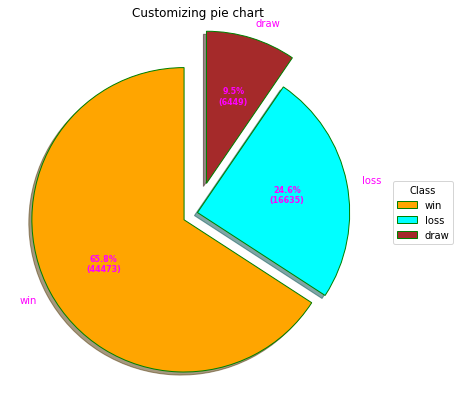

In [8]:
# Visulaze the CLasses
import matplotlib.pyplot as plt
# Creating dataset
Class = ['win','loss' ,'draw']
  

  
  
# # Creating explode data
explode = (0.1, 0.0, 0.2)  
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige","Black")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y1, 
                                  autopct = lambda pct: func(pct, y1),
                                  explode = explode, 
                                  labels = Class,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
  
# Adding legend
ax.legend(wedges, Class,
          title ="Class",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
  
# show plot
plt.show()

In [9]:
# column types
data.dtypes.value_counts()

object    42
int64      1
dtype: int64

In [10]:
X = data.drop(['class'],axis=1)
y = data['class']

In [11]:
from sklearn.impute import SimpleImputer
# One Hot Encoding and nan transformation
X = pd.get_dummies(X)

X

,a1_b,a1_o,a1_x,a2_b,a2_o,a2_x,a3_b,a3_o,a3_x,a4_b,a4_o,a4_x,a5_b,a5_o,a5_x,a6_b,a6_o,a6_x,b1_b,b1_o,b1_x,b2_b,b2_o,b2_x,b3_b,b3_o,b3_x,b4_b,b4_o,b4_x,b5_b,b5_o,b5_x,b6_b,b6_o,b6_x,c1_b,c1_o,c1_x,c2_b,...,e5_x,e6_b,e6_o,e6_x,f1_b,f1_o,f1_x,f2_b,f2_o,f2_x,f3_b,f3_o,f3_x,f4_b,f4_o,f4_x,f5_b,f5_o,f5_x,f6_b,f6_o,f6_x,g1_b,g1_o,g1_x,g2_b,g2_o,g2_x,g3_b,g3_o,g3_x,g4_b,g4_o,g4_x,g5_b,g5_o,g5_x,g6_b,g6_o,g6_x
0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
67553,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
67554,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
67555,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0


In [12]:
# column types
X.dtypes.value_counts()

uint8    126
dtype: int64

In [13]:
X

,a1_b,a1_o,a1_x,a2_b,a2_o,a2_x,a3_b,a3_o,a3_x,a4_b,a4_o,a4_x,a5_b,a5_o,a5_x,a6_b,a6_o,a6_x,b1_b,b1_o,b1_x,b2_b,b2_o,b2_x,b3_b,b3_o,b3_x,b4_b,b4_o,b4_x,b5_b,b5_o,b5_x,b6_b,b6_o,b6_x,c1_b,c1_o,c1_x,c2_b,...,e5_x,e6_b,e6_o,e6_x,f1_b,f1_o,f1_x,f2_b,f2_o,f2_x,f3_b,f3_o,f3_x,f4_b,f4_o,f4_x,f5_b,f5_o,f5_x,f6_b,f6_o,f6_x,g1_b,g1_o,g1_x,g2_b,g2_o,g2_x,g3_b,g3_o,g3_x,g4_b,g4_o,g4_x,g5_b,g5_o,g5_x,g6_b,g6_o,g6_x
0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
67553,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
67554,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
67555,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0


In [14]:
from sklearn.decomposition import PCA
pca = PCA(.90)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)


In [15]:
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.737207,0.161279,2.104090,0.107809,0.102336,0.104606,-0.351979,0.121961,-0.002858,-0.068313,-0.808141,-0.810211,0.221305,0.423958,-0.630291,-0.284514,-0.925410,-0.266022,-0.309871,0.204911,-0.806446,0.507687,0.021865,-0.130765,0.419745,-0.134279,0.212521,0.000385,0.143595,0.232571,-0.745218,-0.132671,-0.290048,-0.032789,-0.023328,0.493793
1,0.349572,0.217254,1.849956,0.049697,0.714080,1.209970,-0.136976,0.211073,0.124221,-0.031239,-0.689447,-0.142507,0.479577,0.457259,-0.671862,-0.513149,-0.815951,-0.092802,-0.442708,0.376825,-0.717831,-0.182944,0.123395,0.669575,0.099238,0.140898,0.144099,0.034218,0.184633,0.268437,-0.704320,-0.248084,-0.309047,-0.049706,-0.061945,0.548081
2,-0.148607,-0.040690,2.032580,0.064839,0.102756,0.346464,-0.602834,0.780139,0.289303,-0.178944,-0.504240,-0.030138,0.001828,1.094386,-0.287510,-0.417044,-0.664876,-0.265482,-0.283677,0.079079,-0.665684,0.567063,-0.177941,0.705578,0.142651,-0.199011,-0.076546,0.200739,0.132951,0.147262,-0.574362,-0.165439,-0.344959,0.001010,-0.105638,0.537209
3,0.254064,0.104367,1.908860,-0.317642,-0.636521,0.826047,-0.201983,0.311312,0.007557,-0.340285,-1.114770,-0.048487,0.365902,0.240235,-0.452260,-0.201674,-0.909270,-0.157921,-0.195028,0.787018,-0.254362,0.668712,-0.116681,0.580580,0.030385,0.140050,0.169805,0.044045,0.165633,0.208356,-0.708154,-0.152151,-0.306952,-0.045041,0.135135,0.538231
4,0.002432,0.738161,1.887693,0.063153,0.008024,0.406734,-0.484217,-0.113430,0.790134,-0.202600,-0.811982,-0.059574,-0.062405,0.166480,-1.165354,-0.409233,-0.443282,-0.214120,-0.294504,0.153045,-0.657017,0.570961,-0.116022,0.648513,0.149141,0.054704,0.253418,-0.329614,0.047849,0.164139,-0.588023,-0.127656,-0.354594,-0.087841,-0.104295,0.536085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,-1.519689,0.023632,-1.145420,1.156749,-0.075613,-0.613155,-0.337881,1.120445,-0.182733,0.454979,-0.368154,0.054594,-0.472057,-0.255157,-0.016022,-0.634931,0.288276,0.102580,-0.991860,-0.274200,0.364540,0.267741,0.809581,-0.325168,0.036861,0.220682,0.111245,0.435911,0.201383,-0.228026,-0.028942,-0.252237,0.220932,0.521280,-0.044132,0.229908
67553,-0.748827,0.745909,-1.063859,1.605728,-0.450715,-0.129774,-0.055649,0.969416,-0.146635,0.680945,-0.508988,0.172222,-0.693740,0.562877,-0.059577,0.156932,0.617404,-0.454453,-0.808882,0.078120,0.051107,-0.235598,-0.681775,-0.085940,0.262562,-0.316730,-0.069543,0.589574,0.148637,-0.062511,-0.173681,0.022026,0.687020,0.306671,-0.029164,-0.245393
67554,-1.206609,0.314542,-1.142982,1.440259,-0.277078,-0.402788,-0.177490,0.983994,-0.172774,0.676542,-0.342767,0.221022,-0.552419,0.749610,-0.318421,0.692957,0.587472,-0.293648,-0.700813,0.171711,0.008633,-0.211410,-0.205441,-0.324453,0.081197,0.309978,0.353510,0.312691,0.297645,0.000855,-0.246692,-0.052651,0.703793,0.432199,-0.019691,0.259627
67555,-0.745207,0.745653,-1.061974,1.603488,-0.454376,-0.137484,-0.056326,1.007375,-0.332752,0.685037,-0.297712,0.211708,-0.602798,0.541546,-0.267323,-0.305457,0.619255,-0.868341,0.274783,0.260974,-0.128157,-0.261714,-0.633736,-0.092869,0.228433,-0.326188,-0.089011,0.574033,0.186021,-0.090211,-0.145595,0.008942,0.653489,0.020132,-0.032633,-0.170083


In [16]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [17]:
finalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,class
0,0.737207,0.161279,2.104090,0.107809,0.102336,0.104606,-0.351979,0.121961,-0.002858,-0.068313,-0.808141,-0.810211,0.221305,0.423958,-0.630291,-0.284514,-0.925410,-0.266022,-0.309871,0.204911,-0.806446,0.507687,0.021865,-0.130765,0.419745,-0.134279,0.212521,0.000385,0.143595,0.232571,-0.745218,-0.132671,-0.290048,-0.032789,-0.023328,0.493793,2
1,0.349572,0.217254,1.849956,0.049697,0.714080,1.209970,-0.136976,0.211073,0.124221,-0.031239,-0.689447,-0.142507,0.479577,0.457259,-0.671862,-0.513149,-0.815951,-0.092802,-0.442708,0.376825,-0.717831,-0.182944,0.123395,0.669575,0.099238,0.140898,0.144099,0.034218,0.184633,0.268437,-0.704320,-0.248084,-0.309047,-0.049706,-0.061945,0.548081,2
2,-0.148607,-0.040690,2.032580,0.064839,0.102756,0.346464,-0.602834,0.780139,0.289303,-0.178944,-0.504240,-0.030138,0.001828,1.094386,-0.287510,-0.417044,-0.664876,-0.265482,-0.283677,0.079079,-0.665684,0.567063,-0.177941,0.705578,0.142651,-0.199011,-0.076546,0.200739,0.132951,0.147262,-0.574362,-0.165439,-0.344959,0.001010,-0.105638,0.537209,2
3,0.254064,0.104367,1.908860,-0.317642,-0.636521,0.826047,-0.201983,0.311312,0.007557,-0.340285,-1.114770,-0.048487,0.365902,0.240235,-0.452260,-0.201674,-0.909270,-0.157921,-0.195028,0.787018,-0.254362,0.668712,-0.116681,0.580580,0.030385,0.140050,0.169805,0.044045,0.165633,0.208356,-0.708154,-0.152151,-0.306952,-0.045041,0.135135,0.538231,2
4,0.002432,0.738161,1.887693,0.063153,0.008024,0.406734,-0.484217,-0.113430,0.790134,-0.202600,-0.811982,-0.059574,-0.062405,0.166480,-1.165354,-0.409233,-0.443282,-0.214120,-0.294504,0.153045,-0.657017,0.570961,-0.116022,0.648513,0.149141,0.054704,0.253418,-0.329614,0.047849,0.164139,-0.588023,-0.127656,-0.354594,-0.087841,-0.104295,0.536085,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,-1.519689,0.023632,-1.145420,1.156749,-0.075613,-0.613155,-0.337881,1.120445,-0.182733,0.454979,-0.368154,0.054594,-0.472057,-0.255157,-0.016022,-0.634931,0.288276,0.102580,-0.991860,-0.274200,0.364540,0.267741,0.809581,-0.325168,0.036861,0.220682,0.111245,0.435911,0.201383,-0.228026,-0.028942,-0.252237,0.220932,0.521280,-0.044132,0.229908,1
67553,-0.748827,0.745909,-1.063859,1.605728,-0.450715,-0.129774,-0.055649,0.969416,-0.146635,0.680945,-0.508988,0.172222,-0.693740,0.562877,-0.059577,0.156932,0.617404,-0.454453,-0.808882,0.078120,0.051107,-0.235598,-0.681775,-0.085940,0.262562,-0.316730,-0.069543,0.589574,0.148637,-0.062511,-0.173681,0.022026,0.687020,0.306671,-0.029164,-0.245393,0
67554,-1.206609,0.314542,-1.142982,1.440259,-0.277078,-0.402788,-0.177490,0.983994,-0.172774,0.676542,-0.342767,0.221022,-0.552419,0.749610,-0.318421,0.692957,0.587472,-0.293648,-0.700813,0.171711,0.008633,-0.211410,-0.205441,-0.324453,0.081197,0.309978,0.353510,0.312691,0.297645,0.000855,-0.246692,-0.052651,0.703793,0.432199,-0.019691,0.259627,1
67555,-0.745207,0.745653,-1.061974,1.603488,-0.454376,-0.137484,-0.056326,1.007375,-0.332752,0.685037,-0.297712,0.211708,-0.602798,0.541546,-0.267323,-0.305457,0.619255,-0.868341,0.274783,0.260974,-0.128157,-0.261714,-0.633736,-0.092869,0.228433,-0.326188,-0.089011,0.574033,0.186021,-0.090211,-0.145595,0.008942,0.653489,0.020132,-0.032633,-0.170083,0


Finshed prepesion

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop(['class'],axis=1), finalDf['class'], test_size=0.2, random_state=42)

In [23]:
import sklearn.linear_model as linear_model
clf = linear_model.Ridge()
clf.fit(X_train,y_train)

Ridge()

In [24]:
y_predicted = clf.predict(X_test)

In [25]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 2))

Mean absolute error = 0.47
Mean squared error = 0.37
Median absolute error = 0.38
Explain variance score = 0.15
R2 score = 0.15


In [26]:
clf = linear_model.BayesianRidge()
clf.fit(X_train,y_train)
y_predicted = clf.predict(X_test)

In [27]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 2))

Mean absolute error = 0.47
Mean squared error = 0.37
Median absolute error = 0.39
Explain variance score = 0.15
R2 score = 0.15


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
dtree_model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
acc = accuracy_score(y_test, dtree_predictions)

In [ ]:
cm


In [30]:
acc

0.7001184132622854

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_train, y_train)
print('on train',accuracy)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print('on test',accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

on train 0.8210750300675363
on test 0.7517761989342806
[[ 173  373  749]
 [ 214 1989 1138]
 [ 195  685 7996]]


Using k-Fold Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=9)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.7612175  0.76195763 0.7605699  0.75936719 0.76602831]
cv_scores mean:0.7618281062077898


In [39]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro']
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=9)
#train model with cv of 5 
# cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
scores = cross_validate(knn_cv, X_train, y_train,scoring=scoring, cv=5)
#print each cv score (accuracy) and average them
print(scores)

{'fit_time': array([0.02162981, 0.01352811, 0.01376128, 0.01385427, 0.01392102]), 'score_time': array([10.53248549,  8.86245275,  8.97984624,  8.99935126,  9.2859509 ]), 'test_precision_macro': array([0.59909746, 0.61676643, 0.60067907, 0.60864064, 0.6203433 ]), 'test_recall_macro': array([0.54263829, 0.54826574, 0.54259257, 0.53924149, 0.55185856])}


In [40]:
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [41]:
print(scores['test_precision_macro'].mean(),'\n' , scores['test_recall_macro'].mean())

0.6091053799068216 
 0.544919329813812


GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [42]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [43]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 9}

In [44]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7618281062077898